In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cp
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import glob
import matplotlib

Pull in a patch with significant severe hail to plot

In [2]:
files = 'data/parallel_run0019_2.nc'
ds = xr.open_dataset(files, engine='netcdf4')
mesh = ds.mesh
mesh_90 = ds.mesh_90
temp = ds.temp_sfc
tempf = (temp - 273.15)*9/5 + 32
cape = ds.cape
refc = ds.refc
vertintliq = ds.vertintliq
mesh.values.max()
ds
index = 0

Identify a patch with significant severe hail and record the index

In [3]:
index = []
for i in range(mesh.values.shape[0]):
    if(mesh[i,:,:].values.max() == 3):
        index.append(i)
        print(i)

170


Plot some example fields from the hrrr dataset

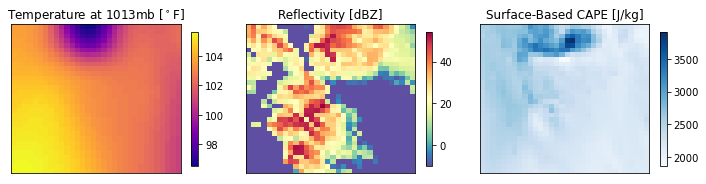

In [7]:
fig,axes0 = plt.subplots(1,3,figsize=(10,8/3))
axes0 = axes0.ravel()

#plot temperature
plot0 = axes0[0].pcolormesh(tempf.values[index][0],cmap='plasma')
#add title
axes0[0].set_title('Temperature at 1013mb [$^\circ$F]')
#remove the tick marks from the axes
axes0[0].set_xticks([])
axes0[0].set_yticks([])
#add the colorbar
plt.colorbar(plot0,ax=axes0[0],shrink=0.9)

#plot the reflectivity
plot1 = axes0[1].pcolormesh(refc.values[index][0],cmap='Spectral_r')
axes0[1].set_title("Reflectivity [dBZ]")
axes0[1].set_xticks([])
axes0[1].set_yticks([])
plt.colorbar(plot1,ax=axes0[1],shrink=0.9)

#plot cape
plot2 = axes0[2].pcolormesh(cape.values[index][0],cmap='Blues')
axes0[2].set_title("Surface-Based CAPE [J/kg]")
axes0[2].set_xticks([])
axes0[2].set_yticks([])
plt.colorbar(plot2,ax=axes0[2],shrink=0.9)

#save out the figure with a white background
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig('HRRR_input_1.png')

Plot again in a different arrangement

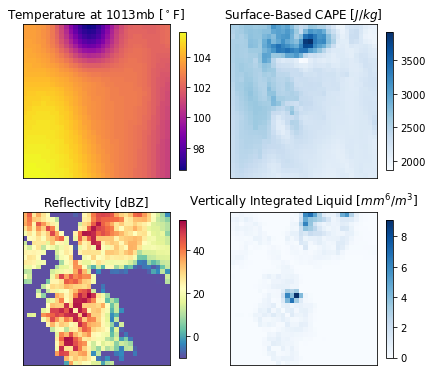

In [6]:
fig,axes0 = plt.subplots(2,2,figsize=(18/3,16/3))
axes0 = axes0.ravel()

#temperature
plot1 = axes0[0].pcolormesh(tempf.values[index][0],cmap='plasma')
axes0[0].set_title("Temperature at 1013mb [$^\circ$F]")
axes0[0].set_xticks([])
axes0[0].set_yticks([])
plt.colorbar(plot1,ax=axes0[0],shrink=0.9)

#cape
plot2 = axes0[1].pcolormesh(cape.values[index][0],cmap='Blues')
axes0[1].set_title("Surface-Based CAPE [$J/kg$]")
axes0[1].set_xticks([])
axes0[1].set_yticks([])
plt.colorbar(plot2,ax=axes0[1],shrink=0.9)

#reflectivity
plot1 = axes0[2].pcolormesh(refc.values[index][0],cmap='Spectral_r')
axes0[2].set_title("Reflectivity [dBZ]")
axes0[2].set_xticks([])
axes0[2].set_yticks([])
plt.colorbar(plot1,ax=axes0[2],shrink=0.9)

#vertically integrated liquid
plot2 = axes0[3].pcolormesh(vertintliq.values[index][0],cmap='Blues')
axes0[3].set_title("Vertically Integrated Liquid [$mm^6/m^3$]")
axes0[3].set_xticks([])
axes0[3].set_yticks([])
plt.colorbar(plot2,ax=axes0[3],shrink=0.9)

plt.tight_layout()
fig.set_facecolor('w')
plt.savefig('HRRR_input_0.png')

Plot the regression and classification truth from MESH at the same timestep

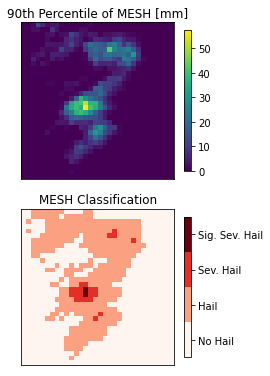

In [8]:
#create the figure and subplots
fig,axes1 = plt.subplots(2,1,figsize=(11/3,16/3))
#put the axes in a list
axes1 = axes1.ravel()

#plot the 90th percentile of mesh
plot0 = axes1[0].pcolormesh(mesh_90.values[index][0])#,cmap='cividis')
axes1[0].set_title('90th Percentile of MESH [mm]')
axes1[0].set_xticks([])
axes1[0].set_yticks([])
plt.colorbar(plot0,ax=axes1[0],shrink=0.9)

#plot the mesh classification
plot1 = axes1[1].pcolormesh(mesh.values[index][0],cmap=matplotlib.cm.get_cmap("Reds", 4))
axes1[1].set_title("MESH Classification")
axes1[1].set_xticks([])
axes1[1].set_yticks([])

#create the discrete colorbar for the classification
cbar = plt.colorbar(plot1,ax=axes1[1],shrink=0.9,ticks=[0.375,1.125,1.875,2.625])
cbar.ax.set_yticklabels(['No Hail','Hail','Sev. Hail','Sig. Sev. Hail'])


plt.tight_layout()
fig.set_facecolor('w')
plt.savefig('MESH_output_0.png',bbox_inches='tight')